In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
DATA_CSV = '../data/history/flightsHistory.csv.gz'
data = pd.read_csv(DATA_CSV)
data.head()

/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_72221/702289898.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_CSV)


,Row,flight_iata,airline_iata,dep_time_utc,dep_actual_utc,arr_time_utc,arr_actual_utc,dep_iata,arr_iata,dep_country_code,...,dep_rain,dep_snowfall,dep_weather_code,dep_cloud_cover,dep_cloud_cover_low,dep_cloud_cover_mid,dep_cloud_cover_high,dep_wind_speed_10m,dep_wind_speed_100m,dep_wind_gusts_10m
0,0,vn30,vn,2022-10-17 14:35:00,2022-10-17 14:54:00,2022-10-18 07:55:00,2022-10-18 06:59:00,FRA,SGN,DE,...,0.0,0.0,3.0,82.199997,53.0,9.0,97.0,6.297428,13.708390,18.000000
1,1,qh74,qh,2022-10-17 20:10:00,2022-10-17 20:31:00,2022-10-18 12:50:00,2022-10-18 12:02:00,FRA,HAN,DE,...,0.0,0.0,2.0,78.000000,0.0,93.0,74.0,6.638072,13.551500,11.520000
2,2,vj910,vj,2022-10-18 01:25:00,2022-10-18 02:45:00,2022-10-18 07:45:00,NaN,BOM,HAN,IN,...,0.2,0.0,51.0,76.200005,22.0,44.0,100.0,3.219938,5.116561,9.000000
3,3,qr970,qr,2022-10-18 02:35:00,2022-10-18 03:03:00,2022-10-18 14:25:00,2022-10-18 14:07:00,DOH,SGN,QA,...,0.0,0.0,0.0,9.900001,0.0,0.0,33.0,11.966953,20.523155,17.280001
4,4,tk162,tk,2022-10-18 02:45:00,2022-10-18 02:40:00,2022-10-18 17:05:00,2022-10-18 16:06:00,IST,SGN,TR,...,0.0,0.0,2.0,61.199997,68.0,0.0,0.0,26.987997,39.463947,46.439999


/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_72221/3221439199.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


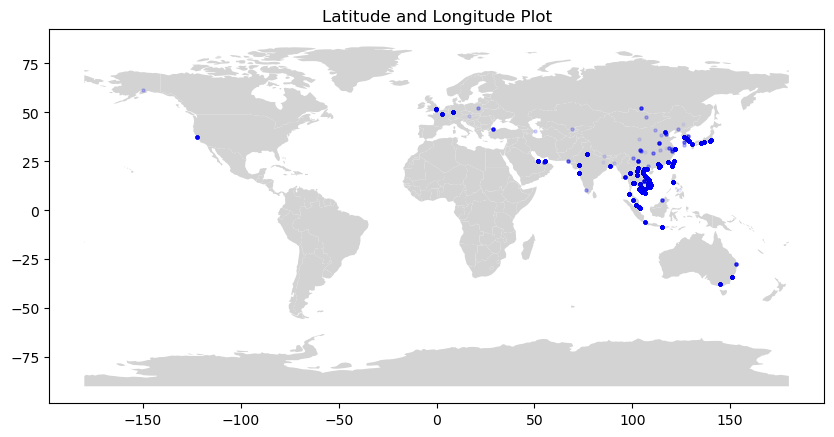

In [4]:
# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(data['arr_longitude'], data['arr_latitude'])
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Create a world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 6), color='lightgray')

# Plot the latitude and longitude points on top of the world map
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.05)

# Set plot title and show the plot
plt.title('Latitude and Longitude Plot')
plt.show()

/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_72221/3619173988.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


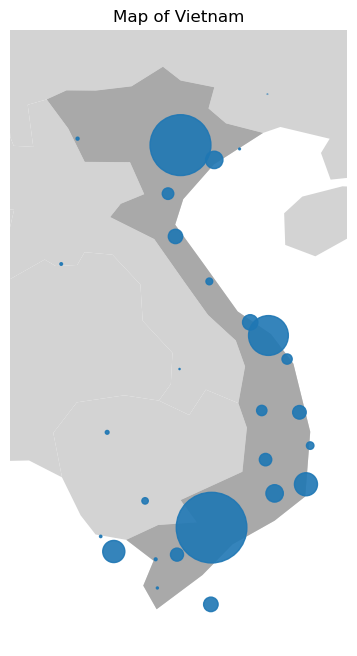

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from math import log

# Load the world map dataset & filter the area surrounding Vietnam
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
vietnam = world[world['name'] == 'Vietnam']
bbox = vietnam.total_bounds 

# Plot the world map
fig, ax = plt.subplots(figsize=(8, 8))
world.plot(ax=ax, color='lightgray')
vietnam.plot(ax=ax, color='darkgray')

# Filter flights to Vietnam
data_flt = data[(data['arr_latitude'] >= bbox[1]) & (data['arr_latitude'] <= bbox[3]) &
                (data['arr_longitude'] >= bbox[0]) & (data['arr_longitude'] <= bbox[2])]

# Count the number of data points at each longitude and latitude
data_counts = data_flt.groupby(['arr_longitude', 'arr_latitude']).size().reset_index(name='counts')

# Create a GeoDataFrame from the count data
geometry = gpd.points_from_xy(data_counts['arr_longitude'], data_counts['arr_latitude'])
gdf = gpd.GeoDataFrame(data_counts, geometry=geometry)

# Plot with marker size based on the logarithm of counts
gdf['scaled_size'] = gdf['counts'].apply(lambda x: x * 0.02)  # Add 1 to avoid log(0)
gdf.plot(ax=ax, markersize=gdf['scaled_size'], alpha=0.9, legend=True)

# Set axis limits to the bounding box of Vietnam
ax.set_xlim(bbox[0]-1, bbox[2]+1)
ax.set_ylim(bbox[1]-1, bbox[3]+1)

# Set plot title and show the plot
plt.title('Map of Vietnam')
plt.axis('off')
plt.show()

/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_72221/699484098.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


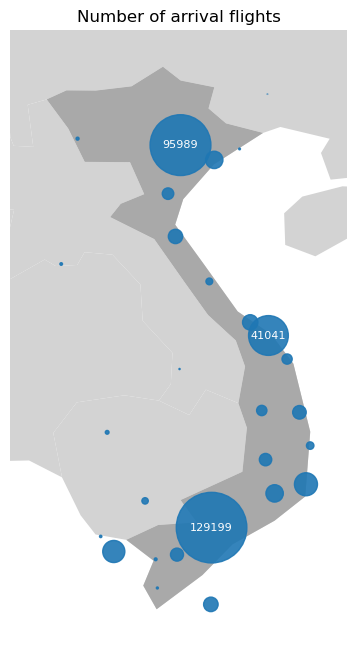

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from math import log

# Load the world map dataset & filter the area surrounding Vietnam
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
vietnam = world[world['name'] == 'Vietnam']
bbox = vietnam.total_bounds 

# Plot the world map
fig, ax = plt.subplots(figsize=(8, 8))
world.plot(ax=ax, color='lightgray')
vietnam.plot(ax=ax, color='darkgray')

# Filter flights to Vietnam
data_flt = data[(data['arr_latitude'] >= bbox[1]) & (data['arr_latitude'] <= bbox[3]) &
                (data['arr_longitude'] >= bbox[0]) & (data['arr_longitude'] <= bbox[2])]

# Count the number of data points at each longitude and latitude
data_counts = data_flt.groupby(['arr_longitude', 'arr_latitude']).size().reset_index(name='counts')

# Create a GeoDataFrame from the count data
geometry = gpd.points_from_xy(data_counts['arr_longitude'], data_counts['arr_latitude'])
gdf = gpd.GeoDataFrame(data_counts, geometry=geometry)

# Sort the data by counts in descending order
gdf = gdf.sort_values(by='counts', ascending=False)

# Plot with marker size based on the logarithm of counts
gdf['scaled_size'] = gdf['counts'].apply(lambda x: x * 0.02)  # Add 1 to avoid log(0)
gdf.plot(ax=ax, markersize=gdf['scaled_size'], alpha=0.9, legend=True)

# Annotate the top three locations with the number of flights
for i in range(3):
    ax.text(gdf.iloc[i]['arr_longitude'], gdf.iloc[i]['arr_latitude'],
            f"{gdf.iloc[i]['counts']}", fontsize=8, ha='center', va='center', color='white')

# Set axis limits to the bounding box of Vietnam
ax.set_xlim(bbox[0]-1, bbox[2]+1)
ax.set_ylim(bbox[1]-1, bbox[3]+1)

# Set plot title and show the plot
plt.title('Number of arrival flights')
plt.axis('off')
plt.show()
